# Simple linear regression

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# load the data into a pandas dataframe
data = pd.DataFrame(
    {
        "Temperature": [15, 18, 21, 24, 27, 30],
        "Ice cream sales": [80, 85, 90, 95, 100, 105],
    }
)
data

,Temperature,Ice cream sales
0,15,80
1,18,85
2,21,90
3,24,95
4,27,100
5,30,105


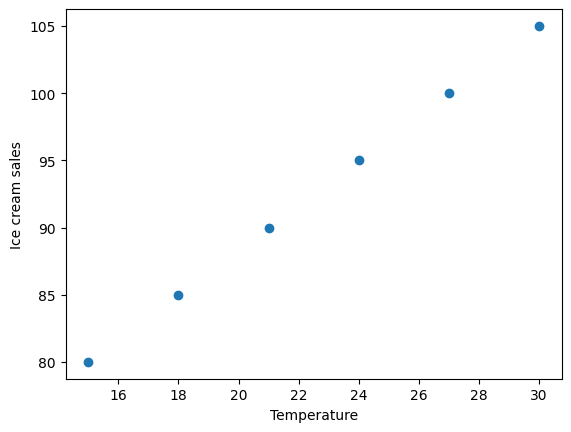

In [29]:
# visualize the data
plt.scatter(data['Temperature'], data['Ice cream sales'])
plt.xlabel('Temperature')
plt.ylabel('Ice cream sales')
plt.show()

In [30]:
data['Temperature'].shape, data['Ice cream sales'].shape

((6,), (6,))

In [31]:
#  the fit method expects the input data to be a 2D array, even if it only has one feature, which is temperature in this case
data[['Temperature']] # double brackets to get a 2D array

,Temperature
0,15
1,18
2,21
3,24
4,27
5,30


In [32]:
data['Ice cream sales'] # single brackets to get a 1D array

0     80
1     85
2     90
3     95
4    100
5    105
Name: Ice cream sales, dtype: int64

In [33]:
# fit a simple linear regression model (simple because we only have one feature - temperature)
model = LinearRegression()
model.fit(data[['Temperature']], data['Ice cream sales'])

LinearRegression()

In [34]:
# predict the ice cream sales for a temperature of 26 degrees
new_temperature = 26
predicted_sales = model.predict([[new_temperature]])
print(f"Predicted ice cream sales at {new_temperature} degrees Celsius is {predicted_sales[0]:.2f} units")

Predicted ice cream sales at 26 degrees Celsius is 98.33 units


c:\Users\hadda\.virtualenvs\Machine-learning-Elias-El-Haddad-LBeJrVzk\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Multiple linear regression

- age: the age of a person
- income: the person's annual income in thousands of dollars
- education: the highest level of education the person has completed, represented as an integer 
    - 1=high school
    - 2=bachelor's degree
    - 3=master's degree
    - 4=PhD
- job_type: the person's type of job, represented as an integer 
    - 1=blue-collar(manual work)
    - 2=white-collar(office work)
    - 3=other
- savings: the person's savings in thousands of dollars

We want to use multiple linear regression to predict a person's savings based on their age, income, education, and job type

In [35]:
# Create a sample dataset
data = pd.DataFrame(
    {
        "age": [25, 30, 35, 40, 45, 50, 55, 60, 65],
        "income": [35, 40, 50, 60, 70, 80, 90, 100, 110],
        "education": [1, 1, 2, 2, 3, 3, 4, 4, 4],
        "job_type": [1, 1, 2, 2, 2, 3, 3, 3, 3],
        "savings": [5, 10, 15, 25, 35, 50, 60, 70, 80],
    }
)
data

,age,income,education,job_type,savings
0,25,35,1,1,5
1,30,40,1,1,10
2,35,50,2,2,15
3,40,60,2,2,25
4,45,70,3,2,35
5,50,80,3,3,50
6,55,90,4,3,60
7,60,100,4,3,70
8,65,110,4,3,80


In [36]:
# split the data into features(input) and target(output) variables
X = data.drop('savings', axis=1) # axis=1 means that we want to drop the column, axis=0 would mean that we want to drop the row, by default axis=0
X

,age,income,education,job_type
0,25,35,1,1
1,30,40,1,1
2,35,50,2,2
3,40,60,2,2
4,45,70,3,2
5,50,80,3,3
6,55,90,4,3
7,60,100,4,3
8,65,110,4,3


In [37]:
y = data['savings']
y

0     5
1    10
2    15
3    25
4    35
5    50
6    60
7    70
8    80
Name: savings, dtype: int64

In [38]:
X.shape, y.shape 

((9, 4), (9,))

In [39]:
# create a linear regression model
model = LinearRegression()

# fit the model to the data
model.fit(X, y)

LinearRegression()

In [41]:
# Make a prediction for a new person who is 50 years old, has an income of $75,000, has a master's degree, and has a white-collar job
new_person = [[50, 75, 3, 2]]
predicted_savings = model.predict(new_person) * 1000
print(f'A person who is 50 years old, has an income of $75,000, has a master\'s degree, and has a white-collar job will have ${predicted_savings[0]:.2f} in savings.')

A person who is 50 years old, has an income of $75,000, has a master's degree, and has a white-collar job will have $38827.59 in savings.


c:\Users\hadda\.virtualenvs\Machine-learning-Elias-El-Haddad-LBeJrVzk\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
